In [1]:
import json
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import sklearn
import numpy as np
# import numpy as np
sns.set()

In [2]:
url = 'https://defillama-kx4jyt9ta-defillama-team.vercel.app/yields/'
f = requests.get(url, allow_redirects=True)

In [3]:
#from https://stackoverflow.com/questions/65910282/jsondecodeerror-invalid-escape-when-parsing-from-python
class LazyDecoder(json.JSONDecoder):
    def decode(self, s, **kwargs):
        regex_replacements = [
            (re.compile(r'([^\\])\\([^\\])'), r'\1\\\\\2'),
            (re.compile(r',(\s*])'), r'\1'),
        ]
        for regex, replacement in regex_replacements:
            s = regex.sub(replacement, s)
        return super().decode(s, **kwargs)

In [4]:
marker1 = '<script id="__NEXT_DATA__" type="application/json">'
marker2 = '</script>'
s = str(f.content)
markerLocation1 = s.find(marker1)
markerLocation2 = s.find(marker2, markerLocation1)
s2 = s[markerLocation1+len(marker1):markerLocation2]
j = json.loads(s2, cls=LazyDecoder)

In [5]:
marker3='"mu":'
markerLocation3=s.find(marker3)
display(s[markerLocation3-10:markerLocation3+10])

''

In [6]:
# if you have it in a file
file='llama.json'
s = open(file, 'r', encoding='utf-8').read()
j = json.loads(s)

In [7]:
# display(j)

In [8]:
d = j['props']['pageProps']
display(d.keys())

dict_keys(['pools', 'chainList', 'projectList'])

In [9]:
df = pd.DataFrame(d['pools'])

In [10]:
df.head(2)

,chain,project,symbol,tvlUsd,apy,pool,apyPct1D,apyPct7D,apyPct30D,projectName,...,predictions,audits,audit_links,url,twitter,category,return,sigma,mu,count
0,Ethereum,lido,stETH,4.615064e+09,3.900000,lido-stETH,0.00000,0.000000,-0.100000,Lido,...,"{'predictedClass': 'Stable/Up', 'predictedProb...",2,[https://github.com/lidofinance/audits],https://lido.fi/,LidoFinance,Liquid Staking,0.000105,0.000086,0.038808,63
1,Ethereum,aave,USDC,1.626306e+09,0.694737,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb480xb5...,0.00142,-0.140143,-0.617551,AAVE,...,"{'predictedClass': 'Stable/Up', 'predictedProb...",2,[https://aave.com/security],https://aave.com\r\n,AaveAave,Lending,0.000019,0.000347,0.019543,144


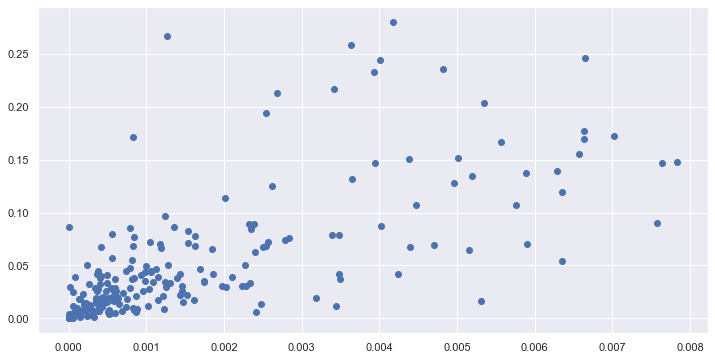

In [11]:
minTVL = 1e7

plt.figure(figsize=(12,6))
df_filtered = df.loc[df.tvlUsd>=minTVL,:]
plt.scatter(df_filtered['sigma'],df_filtered['mu'])
plt.show()

,chain,project,symbol,tvlUsd,return,sigma,mu
59,Osmosis,osmosis,ATOM-OSMO,7.167284e+07,0.000287,0.002679,0.212996


,chain,project,symbol,tvlUsd,return,sigma,mu
35,Ethereum,yearn-finance,yvDAI,1.110531e+08,0.000043,0.000456,0.015267
40,Ethereum,yearn-finance,yvUSDC,9.784789e+07,0.000039,0.000493,0.015789
60,Ethereum,yearn-finance,yvWETH,7.154696e+07,0.000003,0.000285,0.009295
62,Ethereum,yearn-finance,yvCurve-stETH,6.994708e+07,0.000109,0.000382,0.044351


,chain,project,symbol,tvlUsd,return,sigma,mu
0,Ethereum,lido,stETH,4.615064e+09,0.000105,0.000086,0.038808
1,Ethereum,aave,USDC,1.626306e+09,0.000019,0.000347,0.019543
2,Ethereum,curve,FRAX-DAI-USDC-USDT,1.194422e+09,0.000088,0.000416,0.040117
3,Ethereum,convex-finance,FRAX-DAI-USDC-USDT,1.191139e+09,0.000114,0.000835,0.068420


,chain,project,symbol,tvlUsd,return,sigma,mu
33,Binance,ellipsis-finance,ARTH.usd-BUSD-USDC-USDT,1.200844e+08,0.000000,0.002410,0.006430
50,Ethereum,sushiswap,ILV-WETH,7.518449e+07,0.000040,0.000510,0.006037
77,Polygon,quickswap,WMATIC-SAND,5.402395e+07,0.000136,0.001859,0.042332
87,Ethereum,sushiswap,USDC-WETH,4.187970e+07,0.000395,0.007021,0.172530


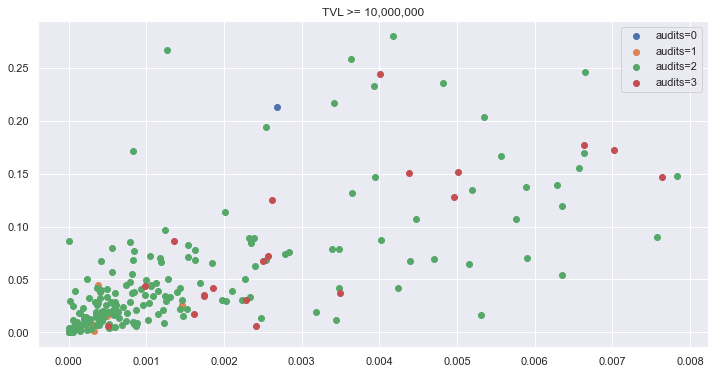

In [12]:
groupName = 'audits'
gb = df_filtered.groupby(by=groupName, dropna=False, as_index=True)

plt.figure(figsize=(12,6))
for g in gb.groups:
    df_plot = gb.get_group(g)
    idx = df_filtered.tvlUsd>=minTVL
    display(df_plot.iloc[0:4,np.r_[0:4,len(df_plot.columns)-4:len(df_plot.columns)-1]])
    plt.scatter(df_plot.loc[idx,'sigma'],df_plot.loc[idx,'mu'],label='{}={}'.format(groupName,g))
plt.legend()
plt.title('TVL >= {:,.0f}'.format(minTVL))
plt.show()

Index(['chain', 'project', 'symbol', 'tvlUsd', 'apy', 'pool', 'apyPct1D',
       'apyPct7D', 'apyPct30D', 'projectName', 'stablecoin', 'ilRisk',
       'exposure', 'predictions', 'audits', 'audit_links', 'url', 'twitter',
       'category', 'return', 'sigma', 'mu', 'count', 'Avalanche', 'Binance',
       'Bitcoin', 'Ethereum', 'Fantom', 'Optimism', 'Osmosis', 'Polygon',
       'Solana'],
      dtype='object')

(223, 10)

(223, 1)

array([[22.24576393, -0.07211246, -0.05137741, -0.02957725, -0.07469246,
        -0.05911472, -0.09096472,  0.067746  , -0.08429589, -0.08029394]])

Mean absolute error: 2.50%
Root mean squared error: 3.87%
R-squared: 56.67%
R-squared adjusted: 54.63%


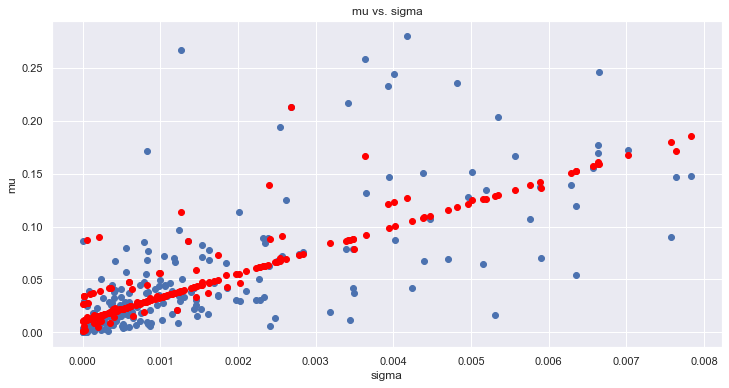

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df_filtered = df.loc[df.tvlUsd>=minTVL,:]
one_hot = pd.get_dummies(df_filtered['chain'],drop_first=True)
# df_filtered = df_filtered.drop('chain',axis = 1)
df_filtered = df_filtered.join(one_hot)
display(df_filtered.columns)

regressor = LinearRegression()
x = df_filtered[['sigma','Avalanche', 'Binance',\
       'Bitcoin', 'Ethereum', 'Fantom', 'Optimism', 'Osmosis', 'Polygon',\
       'Solana']]
display(x.shape)
y = df_filtered.loc[:,['mu']].values.reshape(-1, 1)
display(y.shape)
# x_train, x_test, y_train, y_test = train_test_split(x, y, 
#                                                     test_size=0.2, 
#                                                     random_state=2)
r = regressor.fit(x, y)
display(r.coef_)
p = r.predict(x)
mae = sklearn.metrics.mean_absolute_error(y, p)
mse = sklearn.metrics.mean_squared_error(y, p)
rsq = sklearn.metrics.r2_score(y, p)
rsqa = 1 - (1-rsq) * (len(y)-1)/(len(y)-x.shape[1]-1)
rmse = mse**0.5
# print(dir(regressor))
print(f'Mean absolute error: {mae:.2%}')
# print(f'Mean squared error: {mse:.2%}')
print(f'Root mean squared error: {rmse:.2%}')
print(f'R-squared: {rsq:.2%}')
print(f'R-squared adjusted: {rsqa:.2%}')
plt.figure(figsize=(12,6))
plt.scatter(x.iloc[:,0],y)
plt.scatter(x.iloc[:,0],p,color='red')
plt.title('mu vs. sigma')
plt.ylabel('mu')
plt.xlabel('sigma')
plt.show()

,chain,project,symbol,tvlUsd,apy,pool,apyPct1D,apyPct7D,apyPct30D,projectName,...,count,Avalanche,Binance,Bitcoin,Ethereum,Fantom,Optimism,Osmosis,Polygon,Solana
0,Ethereum,lido,stETH,4.615064e+09,3.9,lido-stETH,0.0,0.0,-0.1,Lido,...,63,0,0,0,1,0,0,0,0,0


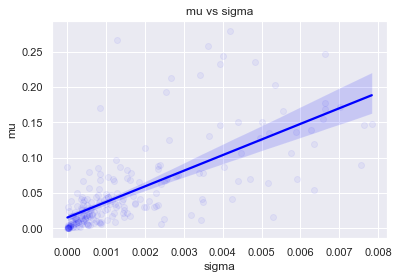

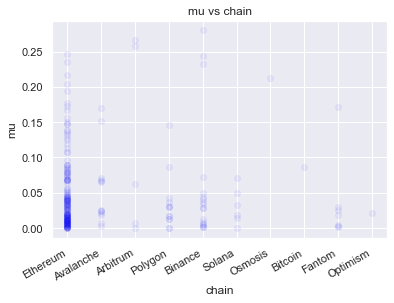

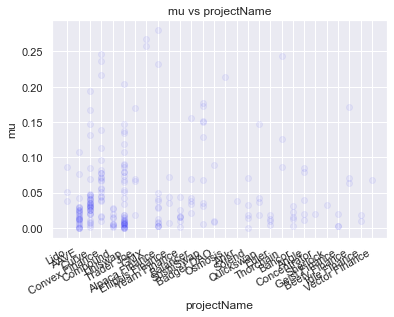

In [14]:
display(df_filtered.head(1))
variables = ['sigma', 'chain','projectName']
# variables = df_filtered.columns

for var in variables:
    plt.figure()
    categorical = type(df_filtered.loc[:,var].values[0])==str
    ax = sns.regplot(x=var, y='mu', data=df_filtered, logistic=False\
        , fit_reg=False if categorical else True, color='blue', scatter_kws={'alpha':0.05})
    ax.set_title(f'mu vs {var}')
    if categorical:
        plt.draw()
        xt = ax.get_xticklabels()
        xl = plt.xlim()
        for i,t in enumerate(xt):
            t.set_rotation(30)
            t.set_horizontalalignment('right')
        ax.xaxis.set_major_locator(mticker.FixedLocator(ax.get_xticks()))
        ax.set_xticklabels(xt)
        plt.xlim(xl[0],xl[1])
        # plt.draw()
plt.show()

In [15]:
import statsmodels.api as sm
import statsmodels.tools as sm_tools
import statsmodels.formula.api as smf

In [16]:
df_filtered = df.loc[df.tvlUsd>=minTVL,:]
drop_cols = []
# one_hot = pd.get_dummies(df_filtered['chain'],drop_first=True)
# df_filtered = df_filtered.drop('chain',axis = 1)
# df_filtered = df_filtered.join(one_hot)
# display(df_filtered.columns)

# regressor = sklearn.linear_model.LinearRegression()
# x = df_filtered[['sigma','Avalanche', 'Binance',\
#        'Bitcoin', 'Ethereum', 'Fantom', 'Optimism', 'Osmosis', 'Polygon',\
#        'Solana']]
# model = sm.OLS(df_filtered.mu, df_filtered[['sigma','chain']])
display(df_filtered.columns)

Index(['chain', 'project', 'symbol', 'tvlUsd', 'apy', 'pool', 'apyPct1D',
       'apyPct7D', 'apyPct30D', 'projectName', 'stablecoin', 'ilRisk',
       'exposure', 'predictions', 'audits', 'audit_links', 'url', 'twitter',
       'category', 'return', 'sigma', 'mu', 'count'],
      dtype='object')

In [17]:
def stepwise_regression(formula,data,use_dropout=False,to_display=True):
    model = smf.ols(formula=formula, data=data)
    results = model.fit()
    drop_cols=[]
    # display(results.summary(title='before stepwise regression'))
    while max(results.pvalues)>0.05 or any(results.pvalues!=results.pvalues):
        idx1 = results.pvalues == max(results.pvalues)
        idx1 = idx1.values.tolist()
        idx2 = [i!=i for i in results.pvalues]
        idx3 = [sum(model.exog[:,i]>0)<5 for i in range(model.exog.shape[1])]
        idx = np.logical_or(np.logical_or(idx1,idx2),idx3)
        for i in results.pvalues[idx].keys():
            drop_cols.append(i)
        model = smf.ols(formula=formula, data=df_filtered, drop_cols=drop_cols)
        results = model.fit()
    if to_display:
        print('=========== RESULTS FOR {} ==========='.format(formula))
        display(results.summary(title='after stepwise regression'))
        # display(sm_tools.eval_measures.meanabs(results.,results.fittedvalues))
        print('rmse={:,.4f}'.format(np.sqrt(results.mse_model)))
        for idx,name in enumerate(model.exog_names):
            print('{:23s} n greater than 0 = {:4.0f}'.format(name,sum(model.exog[:,idx]>0)))
    if use_dropout:
        dropout = []
        while max(results.pvalues)>1e-23:
            old_score=results.rsquared_adj
            idx = results.pvalues == max(results.pvalues)
            droppedcol = results.pvalues[idx].keys()
            drop_cols.append(droppedcol)
            model = smf.ols(formula=model.formula, data=df_filtered, drop_cols=drop_cols)
            results = model.fit()
            new_score=results.rsquared_adj
            dropout.append((old_score-new_score,new_score,droppedcol.values[0]))
        if to_display:
            display(dropout)
            display(results.summary(title='after dropout'))
    return model,results
def logn(x,n):
    return np.log(x)/np.log(n)

df_filtered = df.loc[df.tvlUsd>=minTVL,:].copy()
m,r=stepwise_regression("mu ~ sigma + logn(tvlUsd,10) + C(audits) + C(stablecoin) + C(ilRisk) + C(exposure) + C(chain) + C(project) -1",df_filtered,use_dropout=True)
stepwise_regression("mu ~ sigma + logn(tvlUsd,10) + C(chain) : C(project) -1",df_filtered);
stepwise_regression("mu ~ sigma + logn(tvlUsd,10) -1",df_filtered);
# smf.ols().fit().summary2()

=========== RESULTS FOR mu ~ sigma + logn(tvlUsd,10) + C(audits) + C(stablecoin) + C(ilRisk) + C(exposure) + C(chain) + C(project) -1 ===========


<class 'statsmodels.iolib.summary.Summary'>
"""
                               after stepwise regression                               
=======================================================================================
Dep. Variable:                     mu   R-squared (uncentered):                   0.802
Model:                            OLS   Adj. R-squared (uncentered):              0.789
Method:                 Least Squares   F-statistic:                              60.49
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    1.82e-65
Time:                        16:08:01   Log-Likelihood:                          433.42
No. Observations:                 223   AIC:                                     -838.8
Df Residuals:                     209   BIC:                                     -791.1
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
C(audits)[3]              -0.0438      0.011     -4.006      0.000      -0.065      -0.022
C(ilRisk)[T.yes]           0.0223      0.007      3.124      0.002       0.008       0.036
C(exposure)[T.single]     -0.0269      0.008     -3.485      0.001      -0.042      -0.012
C(chain)[T.Avalanche]     -0.0605      0.015     -4.030      0.000      -0.090      -0.031
C(chain)[T.Binance]       -0.0305      0.014     -2.109      0.036      -0.059      -0.002
C(chain)[T.Ethereum]      -0.0504      0.012     -4.186      0.000      -0.074      -0.027
C(chain)[T.Fantom]        -0.0343      0.017     -1.979      0.049      -0.068      -0.000
C(chain)[T.Polygon]       -0.0584      0.015     -3.806      0.000      -0.089      -0.028
C(project)[T.balancer]    -0.0506      0.016     -3.177      0.002      -0.082      -0.019
C(project)[T.curve]       -0.0250      0.009     -2.916      0.004      -0.042      -0.008
C(project)[T.solend]      -0.0600      0.020     -3.005      0.003      -0.099      -0.021
C(project)[T.uniswap]     -0.0601      0.008     -7.110      0.000      -0.077      -0.043
sigma                     22.8900      1.525     15.014      0.000      19.885      25.896
logn(tvlUsd, 10)           0.0111      0.002      6.627      0.000       0.008       0.014
==============================================================================
Omnibus:                       58.947   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.326
Skew:                           0.978   Prob(JB):                     1.97e-54
Kurtosis:                       7.774   Cond. No.                     4.87e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

rmse=0.2784
C(audits)[3]            n greater than 0 =   20
C(ilRisk)[T.yes]        n greater than 0 =   73
C(exposure)[T.single]   n greater than 0 =   85
C(chain)[T.Avalanche]   n greater than 0 =   13
C(chain)[T.Binance]     n greater than 0 =   18
C(chain)[T.Ethereum]    n greater than 0 =  158
C(chain)[T.Fantom]      n greater than 0 =    7
C(chain)[T.Polygon]     n greater than 0 =   13
C(project)[T.balancer]  n greater than 0 =    6
C(project)[T.curve]     n greater than 0 =   34
C(project)[T.solend]    n greater than 0 =    5
C(project)[T.uniswap]   n greater than 0 =   39
sigma                   n greater than 0 =  222
logn(tvlUsd, 10)        n greater than 0 =  223


[(0.002931904678355468, 0.7858766457117442, 'C(chain)[T.Fantom]'),
 (0.000697261474592481, 0.7851793842371517, 'C(chain)[T.Binance]'),
 (0.0035104414195950007, 0.7816689428175567, 'C(project)[T.solend]'),
 (0.006016935599448825, 0.7756520072181079, 'C(chain)[T.Polygon]'),
 (0.004671984667099061, 0.7709800225510088, 'C(chain)[T.Avalanche]'),
 (0.001794851679694176, 0.7691851708713147, 'C(chain)[T.Ethereum]'),
 (0.006748230124318466, 0.7624369407469962, 'C(project)[T.curve]'),
 (0.004776682445726932, 0.7576602583012693, 'C(exposure)[T.single]'),
 (0.005694031034730318, 0.751966227266539, 'C(project)[T.balancer]'),
 (0.006439317676916967, 0.745526909589622, 'C(audits)[3]'),
 (0.011580738085961384, 0.7339461715036606, 'C(ilRisk)[T.yes]'),
 (0.0261250293313402, 0.7078211421723204, 'C(project)[T.uniswap]'),
 (0.02243451000719876, 0.6853866321651216, 'logn(tvlUsd, 10)')]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     after dropout                                     
=======================================================================================
Dep. Variable:                     mu   R-squared (uncentered):                   0.687
Model:                            OLS   Adj. R-squared (uncentered):              0.685
Method:                 Least Squares   F-statistic:                              486.8
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    7.01e-58
Time:                        16:08:01   Log-Likelihood:                          382.25
No. Observations:                 223   AIC:                                     -762.5
Df Residuals:                     222   BIC:                                     -759.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sigma         26.1987      1.187     22.064      0.000      23.859      28.539
==============================================================================
Omnibus:                       82.685   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              415.580
Skew:                           1.369   Prob(JB):                     5.73e-91
Kurtosis:                       9.101   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

=========== RESULTS FOR mu ~ sigma + logn(tvlUsd,10) + C(chain) : C(project) -1 ===========


<class 'statsmodels.iolib.summary.Summary'>
"""
                               after stepwise regression                               
=======================================================================================
Dep. Variable:                     mu   R-squared (uncentered):                   0.752
Model:                            OLS   Adj. R-squared (uncentered):              0.746
Method:                 Least Squares   F-statistic:                              132.1
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    5.91e-64
Time:                        16:08:01   Log-Likelihood:                          408.23
No. Observations:                 223   AIC:                                     -806.5
Df Residuals:                     218   BIC:                                     -789.4
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
C(chain)[Ethereum]:C(project)[aave]              -0.0221      0.010     -2.129      0.034      -0.043      -0.002
C(chain)[Ethereum]:C(project)[convex-finance]     0.0227      0.009      2.566      0.011       0.005       0.040
C(chain)[Ethereum]:C(project)[uniswap]           -0.0335      0.007     -4.573      0.000      -0.048      -0.019
sigma                                            23.6085      1.444     16.347      0.000      20.762      26.455
logn(tvlUsd, 10)                                  0.0024      0.000      4.857      0.000       0.001       0.003
==============================================================================
Omnibus:                      118.667   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              714.946
Skew:                           2.041   Prob(JB):                    5.64e-156
Kurtosis:                      10.764   Cond. No.                     4.18e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

rmse=0.4510
C(chain)[Ethereum]:C(project)[aave] n greater than 0 =   16
C(chain)[Ethereum]:C(project)[convex-finance] n greater than 0 =   23
C(chain)[Ethereum]:C(project)[uniswap] n greater than 0 =   39
sigma                   n greater than 0 =  222
logn(tvlUsd, 10)        n greater than 0 =  223
=========== RESULTS FOR mu ~ sigma + logn(tvlUsd,10) -1 ===========


<class 'statsmodels.iolib.summary.Summary'>
"""
                               after stepwise regression                               
=======================================================================================
Dep. Variable:                     mu   R-squared (uncentered):                   0.710
Model:                            OLS   Adj. R-squared (uncentered):              0.708
Method:                 Least Squares   F-statistic:                              271.1
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    3.33e-60
Time:                        16:08:01   Log-Likelihood:                          391.00
No. Observations:                 223   AIC:                                     -778.0
Df Residuals:                     221   BIC:                                     -771.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma               22.1498      1.489     14.873      0.000      19.215      25.085
logn(tvlUsd, 10)     0.0020      0.000      4.248      0.000       0.001       0.003
==============================================================================
Omnibus:                      110.032   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.047
Skew:                           1.922   Prob(JB):                    1.64e-124
Kurtosis:                       9.824   Cond. No.                     4.02e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

rmse=0.6931
sigma                   n greater than 0 =  222
logn(tvlUsd, 10)        n greater than 0 =  223


In [18]:
df_filtered.loc[:,'predicted']=r.fittedvalues
df_filtered.loc[:,'resid']=r.resid
df_filtered = df_filtered.sort_values(by='mu',ascending=False)
display(df_filtered.loc[(df_filtered.chain!='Binance') & (df_filtered.project!='gmx') & (df_filtered.ilRisk=='no')\
    ,['project','chain','pool','stablecoin','ilRisk','exposure','sigma','mu','predicted','resid']])
print('interesting aave pool: {}'.format(df_filtered.pool.loc[(abs(df_filtered.mu-0.107097)<=0.000005)].values[0]))

,project,chain,pool,stablecoin,ilRisk,exposure,sigma,mu,predicted,resid
112,convex-finance,Ethereum,0x4f3E8F405CF5aFC05D68142F3783bDfE13811522,True,no,multi,4.823425e-03,0.235797,0.126368,0.109430
101,curve,Ethereum,0x0f9cb53Ebe405d49A0bbdBD291A65Ff571bC83e1-eth...,True,no,multi,5.561305e-03,0.166579,0.145699,0.020880
57,convex-finance,Ethereum,0x5a6A4D54456819380173272A5E8E9B9904BdF41B,True,no,multi,2.009051e-03,0.113862,0.052635,0.061228
195,aave,Ethereum,0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f0xb5...,False,no,single,4.466947e-03,0.107097,0.117028,-0.009931
58,convex-finance,Ethereum,0x43b4FdFD4Ff969587185cDB6f0BD875c5Fc83f8c,True,no,multi,1.238593e-03,0.096860,0.032450,0.064410
...,...,...,...,...,...,...,...,...,...,...
96,curve,Arbitrum,0x7f90122BF0700F9E7e1F688fe926940E8839F353-arb...,True,no,multi,5.278362e-05,0.000875,0.001383,-0.000508
162,aave,Ethereum,0xe41d2489571d322189246dafa5ebde1f4699f4980xb5...,False,no,single,4.353598e-05,0.000604,0.001141,-0.000536
46,aave,Polygon,0x7ceb23fd6bc0add59e62ac25578270cff1b9f6190xd0...,False,no,single,2.653123e-05,0.000266,0.000695,-0.000429
158,solend,Solana,GYzjMCXTDue12eUGKKWAqtF5jcBYNmewr6Db6LaguEaX,False,no,single,1.747965e-05,0.000235,0.000458,-0.000223


interesting aave pool: 0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f0xb53c1a33016b2dc2ff3653530bff1848a515c8c5


In [19]:
gb = df_filtered.groupby(['project'])['chain'].describe()['unique']>1
multiChain = gb.loc[gb.values==True].keys().tolist()
print('multi-chain projects: {}'.format(multiChain))

multi-chain projects: ['aave', 'beefy-finance', 'curve', 'lido', 'sushiswap', 'thorchain', 'yearn-finance']


In [20]:
df_filtered = df.loc[df.tvlUsd>=minTVL,:].copy()
print('observations including single-chain projects: {}'.format(df_filtered.shape[0]))
df_filtered = df_filtered.loc[df_filtered.project.isin(multiChain),:]
print('observations excluding single-chain projects: {}'.format(df_filtered.shape[0]))

formula = "mu ~ sigma + logn(tvlUsd,10) + C(chain) + C(project) -1"
# display(df_filtered.loc[df_filtered.project.isin(multiChain),:])
model = smf.ols(formula=formula, data=df_filtered)
results = model.fit()
display(results.summary())
print('with everything: {}'.format(results.rsquared_adj))

formula = "mu ~ sigma + logn(tvlUsd,10) + C(project) -1"
model = smf.ols(formula=formula, data=df_filtered)
results = model.fit()
display(results.summary())
print('no chain: {}'.format(results.rsquared_adj))

formula = "mu ~ sigma + logn(tvlUsd,10) + C(chain) -1"
model = smf.ols(formula=formula, data=df_filtered)
results = model.fit()
# display(results.summary())
print('no project: {}'.format(results.rsquared_adj))

formula = "mu ~ sigma + logn(tvlUsd,10) -1"
model = smf.ols(formula=formula, data=df_filtered)
results = model.fit()
display(results.summary())
print('no chain or project: {}'.format(results.rsquared_adj))

formula = "mu ~ sigma * logn(tvlUsd,10) -1"
model = smf.ols(formula=formula, data=df_filtered)
results = model.fit()
# display(results.summary())
print('with sigma*log(tvl): {}'.format(results.rsquared_adj))

formula = "mu ~ sigma + logn(tvlUsd,10)"
model = smf.ols(formula=formula, data=df_filtered)
results = model.fit()
# display(results.summary())
print('adding constant: {}'.format(results.rsquared_adj))

observations including single-chain projects: 223
observations excluding single-chain projects: 86


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mu   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     18.78
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           4.39e-19
Time:                        16:08:01   Log-Likelihood:                 203.89
No. Observations:                  86   AIC:                            -373.8
Df Residuals:                      69   BIC:                            -332.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
C(chain)[Arbitrum]             -0.0642      0.046     -1.397      0.167      -0.156       0.027
C(chain)[Avalanche]            -0.0296      0.044     -0.671      0.504      -0.118       0.058
C(chain)[Binance]               0.0517      0.059      0.873      0.386      -0.066       0.170
C(chain)[Bitcoin]              -0.0412      0.058     -0.705      0.483      -0.158       0.075
C(chain)[Ethereum]             -0.0323      0.046     -0.702      0.485      -0.124       0.059
C(chain)[Fantom]               -0.0143      0.045     -0.318      0.752      -0.104       0.075
C(chain)[Optimism]             -0.0569      0.049     -1.163      0.249      -0.155       0.041
C(chain)[Polygon]              -0.0308      0.044     -0.693      0.491      -0.119       0.058
C(chain)[Solana]               -0.0470      0.053     -0.896      0.374      -0.152       0.058
C(project)[T.beefy-finance]     0.0723      0.018      4.107      0.000       0.037       0.107
C(project)[T.curve]             0.0228      0.007      3.203      0.002       0.009       0.037
C(project)[T.lido]              0.0625      0.019      3.291      0.002       0.025       0.100
C(project)[T.sushiswap]         0.0109      0.012      0.926      0.358      -0.013       0.034
C(project)[T.thorchain]         0.0661      0.026      2.524      0.014       0.014       0.118
C(project)[T.yearn-finance]     0.0060      0.011      0.528      0.599      -0.017       0.029
sigma                          24.6985      2.334     10.584      0.000      20.043      29.354
logn(tvlUsd, 10)                0.0037      0.006      0.655      0.515      -0.008       0.015
==============================================================================
Omnibus:                       36.293   Durbin-Watson:                   1.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.542
Skew:                           1.094   Prob(JB):                     9.40e-43
Kurtosis:                      10.016   Cond. No.                     6.62e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

with everything: 0.7699404770612253


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     mu   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     32.22
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           1.38e-21
Time:                        16:08:01   Log-Likelihood:                 194.93
No. Observations:                  86   AIC:                            -371.9
Df Residuals:                      77   BIC:                            -349.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
C(project)[aave]             -0.0375      0.044     -0.860      0.392      -0.124       0.049
C(project)[beefy-finance]     0.0302      0.043      0.708      0.481      -0.055       0.115
C(project)[curve]            -0.0170      0.043     -0.397      0.692      -0.103       0.068
C(project)[lido]              0.0203      0.047      0.428      0.670      -0.074       0.115
C(project)[sushiswap]        -0.0294      0.044     -0.668      0.506      -0.117       0.058
C(project)[thorchain]         0.0516      0.045      1.145      0.256      -0.038       0.141
C(project)[yearn-finance]    -0.0293      0.043     -0.675      0.501      -0.116       0.057
sigma                        25.5930      2.322     11.020      0.000      20.968      30.218
logn(tvlUsd, 10)              0.0043      0.005      0.795      0.429      -0.007       0.015
==============================================================================
Omnibus:                       33.164   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.348
Skew:                           1.092   Prob(JB):                     1.82e-29
Kurtosis:                       8.671   Cond. No.                     6.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

no chain: 0.7461117675605948
no project: 0.6786028552113923


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     mu   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.785
Method:                 Least Squares   F-statistic:                              158.1
Date:                Tue, 05 Jul 2022   Prob (F-statistic):                    3.35e-29
Time:                        16:08:01   Log-Likelihood:                          172.39
No. Observations:                  86   AIC:                                     -340.8
Df Residuals:                      84   BIC:                                     -335.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma               26.0498      2.194     11.874      0.000      21.687      30.413
logn(tvlUsd, 10)     0.0016      0.001      2.657      0.009       0.000       0.003
==============================================================================
Omnibus:                       50.602   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.350
Skew:                           1.826   Prob(JB):                     1.05e-47
Kurtosis:                       9.858   Cond. No.                     4.74e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

no chain or project: 0.7850954870936995
with sigma*log(tvl): 0.7832722763481414
adding constant: 0.6022934341806243


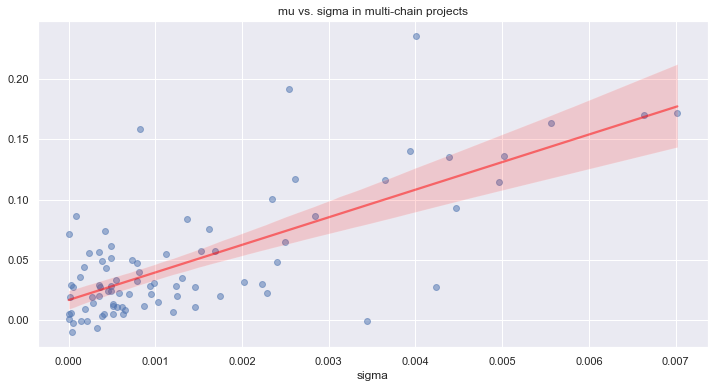

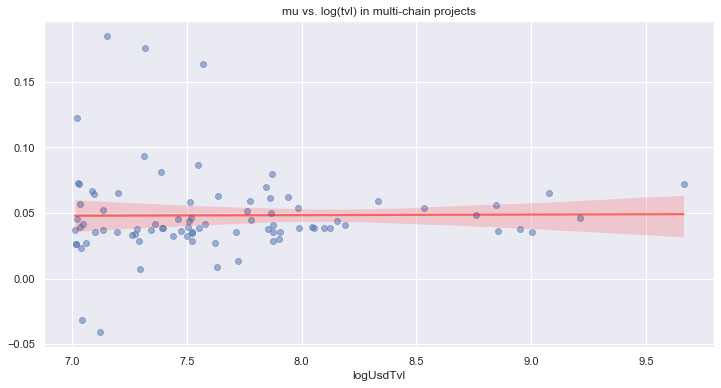

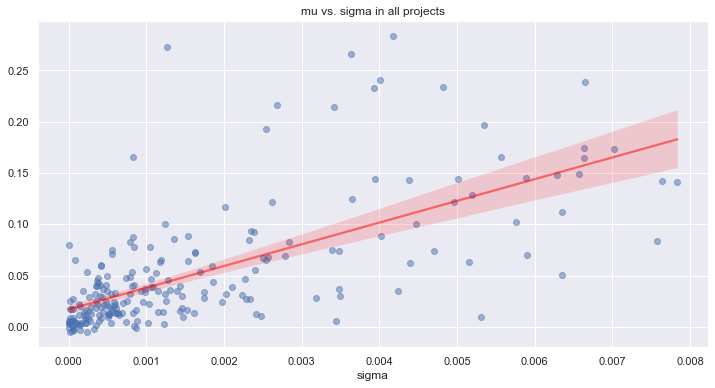

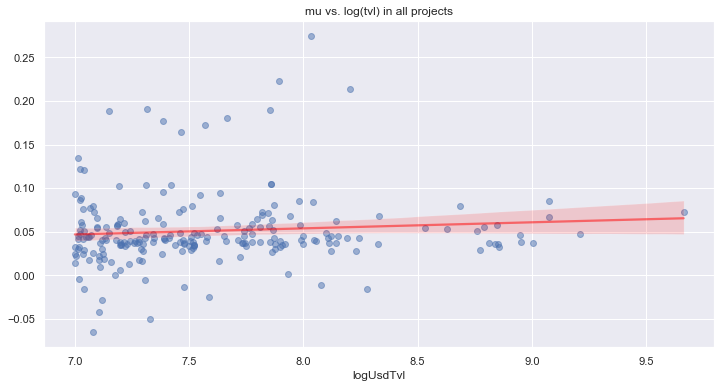

In [21]:
df_filtered.loc[:,'logUsdTvl']=logn(df_filtered.tvlUsd,10)
plt.figure(figsize=(12,6))
s=sns.regplot(x=df_filtered.sigma,y=df_filtered.mu,y_partial=df_filtered.logUsdTvl,line_kws={'color':'red','alpha':0.5},scatter_kws={'alpha':0.5})
s.set_title('mu vs. sigma in multi-chain projects')
plt.figure(figsize=(12,6))
s=sns.regplot(x=df_filtered.logUsdTvl,y=df_filtered.mu,y_partial=df_filtered.sigma,line_kws={'color':'red','alpha':0.5},scatter_kws={'alpha':0.5})
s.set_title('mu vs. log(tvl) in multi-chain projects')
plt.show()

df_filtered = df.loc[df.tvlUsd>=minTVL,:].copy()
df_filtered.loc[:,'logUsdTvl']=logn(df_filtered.tvlUsd,10)
plt.figure(figsize=(12,6))
s=sns.regplot(x=df_filtered.sigma,y=df_filtered.mu,y_partial=df_filtered.logUsdTvl,line_kws={'color':'red','alpha':0.5},scatter_kws={'alpha':0.5})
s.set_title('mu vs. sigma in all projects')
plt.figure(figsize=(12,6))
s=sns.regplot(x=df_filtered.logUsdTvl,y=df_filtered.mu,y_partial=df_filtered.sigma,line_kws={'color':'red','alpha':0.5},scatter_kws={'alpha':0.5})
s.set_title('mu vs. log(tvl) in all projects')
plt.show()

In [22]:
# inspect audit levels
display(df_filtered.audits.value_counts())
cols = df_filtered.columns.tolist()
lkupCols = cols[1:2] + cols[-13:-11]
display(df_filtered.loc[df_filtered.audits=='3',lkupCols])

2    195
3     20
1      7
0      1
Name: audits, dtype: int64

,project,ilRisk,exposure
33,ellipsis-finance,yes,multi
50,sushiswap,yes,multi
77,quickswap,yes,multi
87,sushiswap,yes,multi
92,sushiswap,yes,multi
93,thorchain,yes,multi
99,ellipsis-finance,yes,multi
127,sushiswap,yes,multi
132,thorchain,yes,multi
133,thorchain,yes,multi


In [23]:
import lightgbm as lgb
# fNames = "mu ~ sigma + logn(tvlUsd,10) + C(audits) + C(stablecoin) + C(ilRisk) + C(exposure) + C(chain) + C(project) -1
print(df_filtered.columns)
df_tiny = df_filtered.loc[:,['mu','sigma','logUsdTvl','audits','stablecoin','ilRisk','exposure','chain','project']].copy()
cat_columns = df_tiny.select_dtypes(['object']).columns.values.tolist() + df_tiny.select_dtypes(['bool']).columns.values.tolist()
df_tiny[cat_columns] = df_tiny[cat_columns].apply(lambda x: pd.factorize(x)[0])
display(df_tiny.iloc[:,1:])

Index(['chain', 'project', 'symbol', 'tvlUsd', 'apy', 'pool', 'apyPct1D',
       'apyPct7D', 'apyPct30D', 'projectName', 'stablecoin', 'ilRisk',
       'exposure', 'predictions', 'audits', 'audit_links', 'url', 'twitter',
       'category', 'return', 'sigma', 'mu', 'count', 'logUsdTvl'],
      dtype='object')


,sigma,logUsdTvl,audits,stablecoin,ilRisk,exposure,chain,project
0,0.000086,9.664178,0,0,0,0,0,0
1,0.000347,9.211202,0,1,0,0,0,1
2,0.000416,9.077158,0,1,0,1,0,2
3,0.000835,9.075962,0,1,0,1,0,3
4,0.000428,9.003118,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...
218,0.000867,7.005694,0,1,0,1,0,5
219,0.000413,7.002775,0,0,1,1,1,27
220,0.001024,7.002685,0,0,1,1,0,5
221,0.006356,7.001968,0,0,1,1,0,5


In [28]:
param_basic = {'num_leaves': 31, 'objective': 'regression', 'max_depth': -1, 'learning_rate': 0.3, 'boosting_type': 'gbdt', 'metric': 'rmse'}
param_elite = {'num_leaves': 8, 'objective': 'regression', 'max_depth': -1, 'learning_rate': 0.01, 'boosting_type': 'gbdt', 'metric': 'rmse'\
    , 'min_data_in_leaf': 10, 'bagging_fraction': 0.8, 'feature_fraction': 1, 'bagging_freq': 10}
# param = {'num_leaves': 31, 'objective': 'binary'}
# param['metric'] = ['auc', 'binary_logloss', 'l2']

x_train, x_test, y_train, y_test = train_test_split(df_tiny.iloc[:,1:], df_tiny.mu, test_size=0.4, random_state=2)
train_data = lgb.Dataset(x_train, label=y_train, categorical_feature=['audits','stablecoin','ilRisk','exposure','chain','project'],free_raw_data=False)
valid_data = lgb.Dataset(x_test, label=y_test, categorical_feature=['audits','stablecoin','ilRisk','exposure','chain','project'],free_raw_data=False)

num_round = 100
res=dict()
bst = lgb.train(param_basic, train_data, num_round, valid_sets=[valid_data]\
    , callbacks=[lgb.early_stopping(stopping_rounds=5),lgb.log_evaluation(period=1),lgb.record_evaluation(res)])
rmseToBeat = min(res['valid_0']['rmse'])

num_round = 1000
res=dict()
resNew=dict()
bst = lgb.train(param_elite, train_data, num_round, valid_sets=[valid_data]\
    , callbacks=[lgb.early_stopping(stopping_rounds=5),lgb.log_evaluation(period=1),lgb.record_evaluation(res)])
param_elite['learning_rate'] = 0.3
bst = lgb.train(param_elite, train_data, num_round, valid_sets=[valid_data], init_model=bst\
    , callbacks=[lgb.early_stopping(stopping_rounds=5),lgb.log_evaluation(period=1),lgb.record_evaluation(resNew)])
for sk,sv in res.items():
    for mk,mv in sv.items():
        mv.append(resNew[sk][mk].tolist())
param_elite['learning_rate'] = 0.001
bst = lgb.train(param_elite, train_data, num_round, valid_sets=[valid_data], init_model=bst\
    , callbacks=[lgb.early_stopping(stopping_rounds=5),lgb.log_evaluation(period=1),lgb.record_evaluation(resNew)])
for sk,sv in res.items():
    for mk,mv in sv.items():
        mv.append(resNew[sk][mk].tolist())
display(res)

val = min(res['valid_0']['rmse'])
idx = res['valid_0']['rmse'].index(val)
# rmseToBeat = 0.0361655
print('         rmse to beat = {}'.format(rmseToBeat))
# display('val={} idx={}'.format(val,idx))
# print('         rmse = {}'.format(val))
print('          improvement = {:,.2%}'.format(1-val/rmseToBeat))
# res['valid_0']['rmse'][bst.best_iteration]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 125
[LightGBM] [Info] Number of data points in the train set: 133, number of used features: 8
[LightGBM] [Info] Start training from score 0.055484
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's rmse: 0.0434026
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's rmse: 0.0393326
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's rmse: 0.0366359
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's rmse: 0.0364582
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's rmse: 0.0369253
[LightGBM]

c:\Python310\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
c:\Python310\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
c:\Python310\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


AttributeError: 'list' object has no attribute 'tolist'

In [ ]:
lgb.plot_importance(bst)
plt.show()

lgb.plot_split_value_histogram(bst, feature='sigma')
plt.show()

# lgb.plot_tree(bst, tree_index=0)
# plt.show()

lgb.plot_metric(res, metric='rmse')
plt.show()

last_data = res['valid_0']['rmse'][-100:]
display(last_data)

p=lgb.plot_metric(res, metric='rmse')
xl=plt.gca().get_xlim()
display(xl)
xl = (100,xl[1])
plt.gca().set_xlim(xl)
plt.gca().set_ylim((min(last_data),max(last_data)))
plt.scatter(idx,val)
plt.show()

# print(dir(bst))
# print(bst.model_to_string())

In [ ]:
plt.scatter(y_test,bst.predict(x_test),alpha=0.5)
plt.scatter(y_train,bst.predict(x_train),alpha=0.5)
plt.show()